In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('Training_wells.csv')

df.head()

,Well,X,Y,NTG
0,201-907,201,907,0.2006
1,201-914,201,914,0.3624
2,201-924,201,924,0.4381
3,202-922,202,922,0.4289
4,202-925,202,925,0.4021


In [5]:
df.describe()

,X,Y,NTG
count,138.000000,138.000000,138.000000
mean,223.195652,916.630435,0.325720
std,13.590926,8.765456,0.072432
min,201.000000,901.000000,0.177000
25%,211.000000,909.000000,0.270175
50%,222.500000,917.000000,0.325900
75%,236.500000,924.000000,0.377475
max,246.000000,930.000000,0.562500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Well    138 non-null    object 
 1   X       138 non-null    int64  
 2   Y       138 non-null    int64  
 3   NTG     138 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.4+ KB


In [10]:
# df.drop(['Well'], axis=1, inplace=True)

df.head()

,X,Y,NTG
0,201,907,0.2006
1,201,914,0.3624
2,201,924,0.4381
3,202,922,0.4289
4,202,925,0.4021


### идеи решения:
### 1.построить простейшую линейную модель или поли...
### 1.изучить распределния данных и прости ряд статисчтических тестов
### 1.построить кривые обучения
### 1.сжать пространство
### 1.отбор модели
### 1.использовать более продвинутые алгоритмы

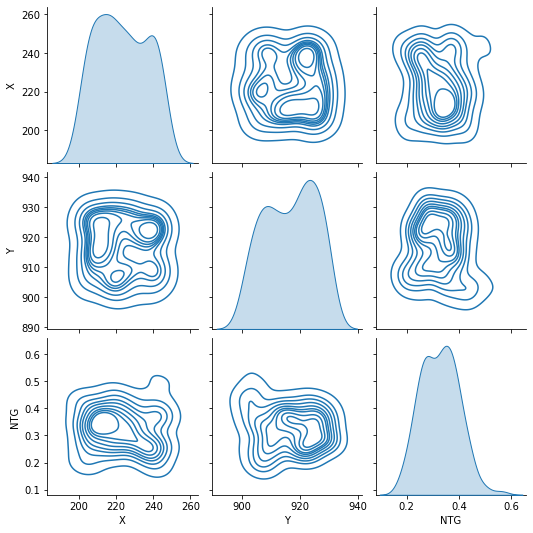

In [12]:
sns.pairplot(df, kind='kde')

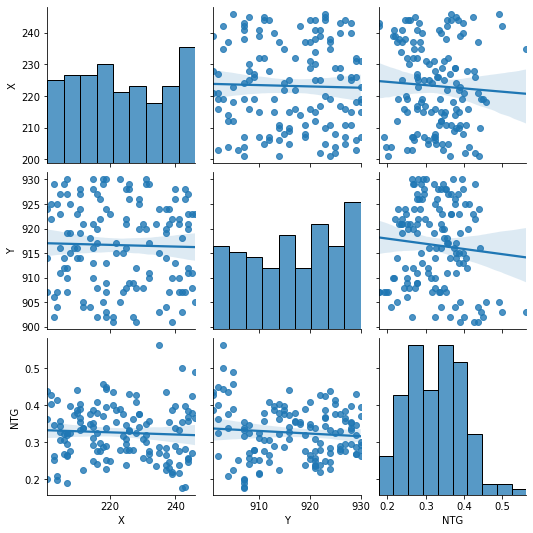

In [19]:
sns.pairplot(df, kind='reg')

e:\pythonyandex\work\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


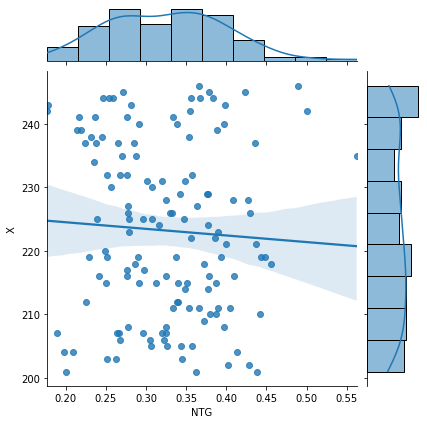

In [23]:
sns.jointplot('NTG', 'X', data=df, kind='reg')

<AxesSubplot:>

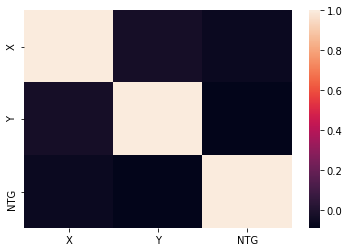

In [24]:
sns.heatmap(df.corr())

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split

In [142]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
estimators = [('scaler', StandardScaler()), ('linear', LinearRegression())]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

print('rmse', mean_squared_error(y_test, pipe.predict(X_test), squared=False))
print('r2', r2_score(y_test, pipe.predict(X_test)))

rmse 0.08187827633964413
r2 0.0220627421220716


In [35]:
X = df.iloc[:, :-1].values
X

array([[201, 907],
       [201, 914],
       [201, 924],
       [202, 922],
       [202, 925],
       [203, 902],
       [203, 906],
       [203, 929],
       [204, 904],
       [204, 907],
       [204, 925],
       [205, 911],
       [205, 916],
       [205, 923],
       [205, 927],
       [206, 912],
       [206, 914],
       [206, 929],
       [207, 907],
       [207, 910],
       [207, 912],
       [207, 919],
       [207, 927],
       [207, 930],
       [208, 915],
       [208, 919],
       [208, 925],
       [209, 916],
       [210, 914],
       [210, 916],
       [210, 923],
       [211, 914],
       [211, 919],
       [211, 924],
       [211, 927],
       [211, 928],
       [212, 904],
       [212, 905],
       [212, 921],
       [214, 904],
       [214, 918],
       [215, 910],
       [215, 913],
       [215, 916],
       [215, 921],
       [215, 928],
       [215, 930],
       [216, 902],
       [216, 908],
       [216, 917],
       [216, 920],
       [216, 927],
       [217,

In [36]:
y = df.iloc[:, -1].values
y

array([0.2006, 0.3624, 0.4381, 0.4289, 0.4021, 0.2628, 0.2517, 0.3452,
       0.2092, 0.1974, 0.4136, 0.3061, 0.3268, 0.3431, 0.3568, 0.3054,
       0.3228, 0.2682, 0.1897, 0.3249, 0.2659, 0.3205, 0.2963, 0.2637,
       0.3971, 0.2775, 0.3244, 0.3729, 0.3801, 0.4419, 0.3869, 0.4042,
       0.3901, 0.3333, 0.3661, 0.3533, 0.3394, 0.2251, 0.3388, 0.3769,
       0.3484, 0.3125, 0.3867, 0.3402, 0.25  , 0.3512, 0.2918, 0.3248,
       0.2419, 0.3791, 0.4099, 0.2759, 0.2979, 0.2762, 0.4562, 0.2865,
       0.3721, 0.4488, 0.4436, 0.3375, 0.2514, 0.2895, 0.2287, 0.3941,
       0.2484, 0.4369, 0.4   , 0.3857, 0.3557, 0.3894, 0.2795, 0.3162,
       0.3775, 0.3471, 0.3081, 0.2386, 0.2794, 0.2961, 0.2778, 0.3299,
       0.3322, 0.429 , 0.3636, 0.2778, 0.4268, 0.325 , 0.4079, 0.3421,
       0.3774, 0.3764, 0.2562, 0.3074, 0.3486, 0.3201, 0.3018, 0.2519,
       0.2766, 0.3579, 0.2674, 0.2347, 0.5625, 0.2874, 0.2696, 0.4356,
       0.2244, 0.2381, 0.2653, 0.2851, 0.3534, 0.2312, 0.2454, 0.3882,
      

In [143]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
estimators = [('norm', Normalizer()), ('linear', LinearRegression())]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

print('rmse', mean_squared_error(y_test, pipe.predict(X_test), squared=False))
print('r2', r2_score(y_test, pipe.predict(X_test)))

rmse 0.08257854016920502
r2 0.005263596958597794


In [144]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
estimators = [('scaler', StandardScaler()), ('pca', PCA(n_components=1, whiten=True)), ('linear', LinearRegression())]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


print('rmse', mean_squared_error(y_test, pipe.predict(X_test), squared=False))
print('r2', r2_score(y_test, pipe.predict(X_test)))

rmse 0.08340592370136098
r2 -0.014769492112406857


In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
mean_squared_error(y_test, pipe.predict(X_test))

0.006892310367731874

In [56]:
cross_val_score(pipe, X, y, scoring='neg_mean_squared_error').mean()

-0.0053668401632565345

In [54]:
skl.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [145]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# pca = PCA(n_components=1, whiten=True)
linear = LinearRegression()
# linear.fit(X_train, y_train)
cross_val_score(linear, X_train, y_train, scoring='neg_mean_squared_error', cv=10).mean()

print('rmse', mean_squared_error(y_test, pipe.predict(X_test), squared=False))
print('r2', r2_score(y_test, pipe.predict(X_test)))

rmse 0.20852729260404657
r2 -5.343068750334873


In [61]:
linear.fit(X_train, y_train)
mean_squared_error(y_test, linear.predict(X_test))

0.006841707956288744

In [62]:
# Линейная модель показала очень плохие результаты

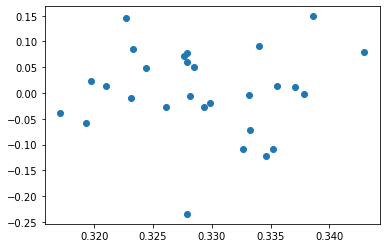

In [63]:
e = linear.predict(X_test) - y_test
plt.scatter(linear.predict(X_test), e)

# Можно добавить отношение X/Y
# Ввести преобразование бокса-кокса

In [64]:
from statsmodels.stats.stattools import durbin_watson as dw
import statsmodels.api as sm

ols = sm.OLS(y_train, X_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.018
Method:                 Least Squares   F-statistic:                            0.02802
Date:                Wed, 24 Feb 2021   Prob (F-statistic):                       0.972
Time:                        22:58:29   Log-Likelihood:                         -35.056
No. Observations:                 110   AIC:                                      74.11
Df Residuals:                     108   BIC:                                      79.51
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0062      0.032     -0.194      0.846      -0.070       0.057
x2            -0.0044      0.032     -0.137      0.891      -0.068       0.059
==============================================================================
Omnibus:                        2.078   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.507
Skew:                           0.042   Prob(JB):                        0.471
Kurtosis:                       2.433   Cond. No.                         1.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
DW = dw(e)
DW

1.9104165505121826

In [68]:
pip install pylab

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pylab
ERROR: No matching distribution found for pylab


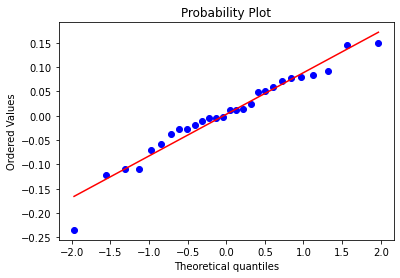

In [71]:
# Аанализ остатоков показал неплохой результат, так как примерно равно двум, проверим на номальность
import pylab
from scipy import stats
stats.probplot(e, dist="norm", plot=pylab);
pylab.show();

In [74]:
_, p = stats.normaltest(e)
alpha = 1e-3
if not p < alpha:
    print(' x comes from a normal distribution')
p

 x comes from a normal distribution


0.12466425932897791

<AxesSubplot:ylabel='Density'>

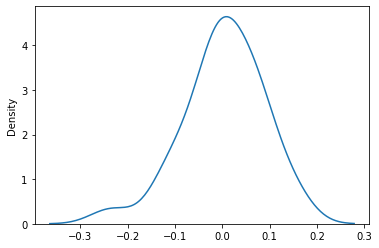

In [75]:
sns.kdeplot(e)

In [76]:
df.head()

,X,Y,NTG
0,201,907,0.2006
1,201,914,0.3624
2,201,924,0.4381
3,202,922,0.4289
4,202,925,0.4021


In [77]:
df['X/Y'] = df['X'] / df['Y']

df.head()

,X,Y,NTG,X/Y
0,201,907,0.2006,0.221610
1,201,914,0.3624,0.219912
2,201,924,0.4381,0.217532
3,202,922,0.4289,0.219089
4,202,925,0.4021,0.218378


In [82]:
df = pd.concat([df.iloc[:, :2], df['X/Y'], df['NTG']], axis=1)
df

,X,Y,X/Y,NTG
0,201,907,0.221610,0.2006
1,201,914,0.219912,0.3624
2,201,924,0.217532,0.4381
3,202,922,0.219089,0.4289
4,202,925,0.218378,0.4021
...,...,...,...,...
133,245,908,0.269824,0.2719
134,245,911,0.268935,0.3780
135,245,923,0.265439,0.4239
136,246,905,0.271823,0.4900


In [146]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# pca = PCA(n_components=1, whiten=True)
linear = LinearRegression()
# linear.fit(X_train, y_train)
print(cross_val_score(linear, X_train, y_train, scoring='neg_mean_squared_error', cv=10).mean())

linear.fit(X_train, y_train)
mean_squared_error(y_test, linear.predict(X_test))

print('rmse', mean_squared_error(y_test, pipe.predict(X_test), squared=False))
print('r2', r2_score(y_test, pipe.predict(X_test)))

-0.004801672507914795
rmse 0.20852729260404657
r2 -5.343068750334873


e:\pythonyandex\work\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X/Y', ylabel='Density'>

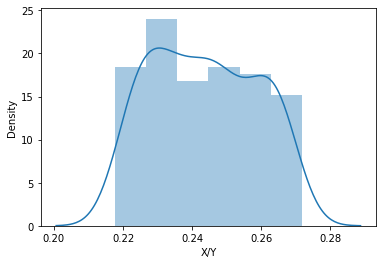

In [89]:
sns.distplot(df['X/Y'])

In [95]:
a = np.array([[1, 2, 3], [6, 7, 8]])
a[:, 1] = [12, 34]
a.copy()

array([[ 1, 12,  3],
       [ 6, 34,  8]])

In [147]:
# Выполним преобразование Бокса_Кокса и посмотрим что будет
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
for i in range(X_train_copy.shape[1]):
    X_train_copy[:, i], lambd_x = stats.boxcox(X_train_copy[:, i])
    X_test_copy[:, i] = stats.boxcox(X_test_copy[:, i], lambd_x)

X_train_copy

array([[ 5.72173953e+02,  1.90576041e+53, -6.93926118e-01],
       [ 5.22954237e+02,  2.10462374e+53, -7.10132177e-01],
       [ 5.63435823e+02,  2.10462374e+53, -6.97730812e-01],
       [ 4.77311707e+02,  1.94405328e+53, -7.23408654e-01],
       [ 6.01457963e+02,  1.86818156e+53, -6.84694577e-01],
       [ 5.98518845e+02,  1.79511591e+53, -6.85119005e-01],
       [ 5.14344649e+02,  1.52900126e+53, -7.09454823e-01],
       [ 5.11480000e+02,  1.27432144e+53, -7.08439376e-01],
       [ 5.37355115e+02,  1.30049862e+53, -7.00473662e-01],
       [ 5.86786055e+02,  1.52900126e+53, -6.86834167e-01],
       [ 5.80933981e+02,  1.35438604e+53, -6.87222059e-01],
       [ 4.85817404e+02,  1.46855857e+53, -7.18003012e-01],
       [ 5.14344649e+02,  2.06334487e+53, -7.12571667e-01],
       [ 5.43133294e+02,  1.38211500e+53, -6.99327849e-01],
       [ 4.85817404e+02,  1.62409296e+53, -7.19003297e-01],
       [ 4.74481956e+02,  1.90576041e+53, -7.24094768e-01],
       [ 5.22954237e+02,  2.14668268e+53

In [148]:
y_train_c = y_train.copy()
y_test_c = y_test.copy()
y_train_c, lambd_y = stats.boxcox(y_train_c)
y_test_c = stats.boxcox(y_test_c, lambd_y)

y_train_c

array([-0.85223794, -0.82779904, -0.85545135, -0.67034672, -0.64221897,
       -0.86867744, -0.69048199, -0.70341561, -0.68693531, -0.67659842,
       -0.73483262, -0.79996987, -0.73780411, -0.74335626, -0.77113083,
       -0.62412153, -0.70978573, -0.7287711 , -0.87860983, -0.88667059,
       -0.90948676, -0.54711236, -0.91990103, -0.90052218, -0.88801897,
       -0.91330514, -0.74132281, -0.77361724, -0.82022113, -0.67307918,
       -0.69918185, -0.84307737, -0.83484105, -0.84032653, -0.62564429,
       -0.6272953 , -0.63850899, -0.79715949, -0.6554554 , -0.71778178,
       -0.68601696, -0.85852581, -0.75465423, -0.87831225, -0.71698049,
       -0.7087224 , -0.86087297, -0.69179738, -0.75424449, -0.93647456,
       -0.82980748, -0.70407807, -0.82150513, -0.71657998, -0.78040599,
       -0.88352986, -0.80095475, -0.7211246 , -0.79099508, -0.76369516,
       -0.81154829, -0.77444692, -0.83801424, -0.752743  , -0.67685938,
       -0.73051994, -0.90416094, -0.68851074, -0.70050379, -0.77

In [150]:
from scipy import special
linear = LinearRegression()
print(cross_val_score(linear, X_train_copy, y_train_c, scoring='neg_mean_squared_error', cv=10).mean())

linear.fit(X_train_copy, y_train_c)
print('rmse', mean_squared_error(special.inv_boxcox(y_test_c, lambd_y), special.inv_boxcox(linear.predict(X_test_copy), lambd_x), squared=False))

-0.009765015786959397
rmse 0.19093528731117884


In [ ]:
print('rmse', mean_squared_error(y_test, pipe.predict(X_test), squared=False))
print('r2', r2_score(y_test, pipe.predict(X_test)))

e:\pythonyandex\work\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\pythonyandex\work\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\pythonyandex\work\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='NTG', ylabel='Density'>

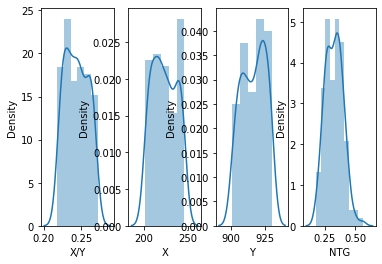

In [93]:
# _, ax=plt.subplots(1,4)

# sns.distplot(df['X/Y'], ax=ax[0])
# sns.distplot(df['X'], ax=ax[1])
# sns.distplot(df['Y'], ax=ax[2])
# sns.distplot(df['NTG'], ax=ax[3])

e:\pythonyandex\work\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\pythonyandex\work\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\pythonyandex\work\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:ylabel='Density'>

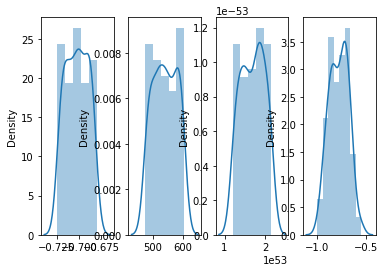

In [107]:
_, ax=plt.subplots(1,4)

sns.distplot(X_train_copy[:, 2], ax=ax[0])
sns.distplot(X_train_copy[:, 0], ax=ax[1])
sns.distplot(X_train_copy[:, 1], ax=ax[2])
sns.distplot(y_train_c, ax=ax[3])

In [108]:
# Преобразование Бокса-Кокса не дало никаких результатов

In [109]:
# Соберем результат в некотруые функции и будем использовать 

In [110]:
# Бустинг
# КэтБустинг
# Рекуррентная нейронная сеть
# Нейронка полносвязная
# Другие алгоритмы 
# полиномиальная регр
# Перемножить X * Y

In [111]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

df

,X,Y,X/Y,NTG
0,201,907,0.221610,0.2006
1,201,914,0.219912,0.3624
2,201,924,0.217532,0.4381
3,202,922,0.219089,0.4289
4,202,925,0.218378,0.4021
...,...,...,...,...
133,245,908,0.269824,0.2719
134,245,911,0.268935,0.3780
135,245,923,0.265439,0.4239
136,246,905,0.271823,0.4900


In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'base_estimator__criterion': ['mse'],
             'base_estimator__splitter': ['best'],
             'base_estimator__max_depth': [2, 4, 6],
             'base_estimator__min_samples_split': [2, 4, 6],
             'base_estimator__max_features': ['auto', 'log2', 'sqrt', None],
             'n_estimators': [50, 100, 150, 200],
             'learning_rate': [0.1, 0.2],
             'loss': ['linear', 'square', 'exponential'] 
             }

DTR = DecisionTreeRegressor()
ABR = AdaBoostRegressor(base_estimator=DTR)

# Добавить  проверку перекрестную
grid_search = GridSearchCV(ABR, param_grid=param_grid, scoring = 'neg_mean_squared_error')

grid_search.fit(X_train, y_train)
mean_squared_error(y_test, grid_search.predict(X_test))

0.00469152375675712

In [127]:
grid_search.best_params_

{'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': 4,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__min_samples_split': 4,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.2,
 'loss': 'exponential',
 'n_estimators': 50}

In [130]:
X = df.iloc[:, :-2].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

df

DTR = DecisionTreeRegressor()
ABR = AdaBoostRegressor(base_estimator=DTR)
grid_search = GridSearchCV(ABR, param_grid=param_grid, scoring = 'neg_mean_squared_error')

grid_search.fit(X_train, y_train)
mean_squared_error(y_test, grid_search.predict(X_test))

0.003854684057594328

In [128]:
df.iloc[:, :-2]

,X,Y
0,201,907
1,201,914
2,201,924
3,202,922
4,202,925
...,...,...
133,245,908
134,245,911
135,245,923
136,246,905


In [131]:
# polinomial

In [139]:
from sklearn.metrics import r2_score
r2_score(y_test, grid_search.predict(X_test))

0.4377073625621746

In [155]:
X = df.iloc[:, :-2].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('rmse', mean_squared_error(y_test, grid_search.predict(X_test), squared=False)) # rmse
print('R2', r2_score(y_test, grid_search.predict(X_test)))

rmse 0.06208610196810819
R2 0.4377073625621746


In [137]:
y_test

array([0.3533, 0.3333, 0.2961, 0.2628, 0.3249, 0.25  , 0.177 , 0.4562,
       0.2778, 0.3375, 0.3074, 0.3394, 0.2562, 0.378 , 0.3568, 0.3333,
       0.2386, 0.2762, 0.3484, 0.4419, 0.2682, 0.5625, 0.4436, 0.2419,
       0.1897, 0.3228, 0.355 , 0.4042])

In [135]:
grid_search.predict(X_test)

array([0.33983333, 0.33514091, 0.3361    , 0.3248    , 0.2839    ,
       0.34267778, 0.23043333, 0.370175  , 0.30926667, 0.3052    ,
       0.344575  , 0.34056667, 0.32693571, 0.3334    , 0.33495   ,
       0.2271    , 0.33076667, 0.32658095, 0.35026563, 0.35085455,
       0.32279375, 0.4125    , 0.421425  , 0.30705556, 0.23668   ,
       0.33225714, 0.28481429, 0.35085455])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def poly_regressor(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

X = df.iloc[:, :-2].values
y = df.iloc[:, -1].values


from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(poly_regressor(), X, y,  scoring="neg_mean_squared_error", n_jobs=1, cv=10, param_name='polynomialfeatures__degree', 
                 param_range=degree)

plt.plot(degree, np.mean(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.mean(val_score, axis=1), color='red', label='validation score')

In [156]:
df.head()

,X,Y,X/Y,NTG
0,201,907,0.221610,0.2006
1,201,914,0.219912,0.3624
2,201,924,0.217532,0.4381
3,202,922,0.219089,0.4289
4,202,925,0.218378,0.4021


In [157]:
df.drop(['X/Y'], axis=1, inplace=True)
df.head()

,X,Y,NTG
0,201,907,0.2006
1,201,914,0.3624
2,201,924,0.4381
3,202,922,0.4289
4,202,925,0.4021


In [158]:
pip install featuretools

In [159]:
import featuretools as ft

In [160]:
df = pd.read_csv('Training_wells.csv')

df.head()

,Well,X,Y,NTG
0,201-907,201,907,0.2006
1,201-914,201,914,0.3624
2,201-924,201,924,0.4381
3,202-922,202,922,0.4289
4,202-925,202,925,0.4021


In [162]:
df.Well.value_counts().shape

(138,)

In [166]:
es = ft.EntitySet(id='NTG')
es.entity_from_dataframe(entity_id='ntg', dataframe=df.drop(['NTG'], axis=1), index='Well')

print(es)

Entityset: NTG
  Entities:
    ntg [Rows: 138, Columns: 3]
  Relationships:
    No relationships


In [173]:
feature_matrix, feature_names = ft.dfs(entityset=es, target_entity='ntg', max_depth=2, verbose=1, trans_primitives=["add_numeric", "multiply_numeric"])

Built 4 features
Elapsed: 00:00 | Progress: 100%|██████████████████████████████████████████████████████████████████████████████


In [174]:
feature_matrix

,X,Y,X + Y,X * Y
Well,,,,
201-907,201,907,1108,182307
201-914,201,914,1115,183714
201-924,201,924,1125,185724
202-922,202,922,1124,186244
202-925,202,925,1127,186850
...,...,...,...,...
245-908,245,908,1153,222460
245-911,245,911,1156,223195
245-923,245,923,1168,226135


In [180]:
list_fun = ft.list_primitives()
list_fun[list_fun['type'] == 'transform'][['name', 'description']]

,name,description
22,week,Determines the week of the year from a datetime.
23,modulo_numeric,Element-wise modulo of two lists.
24,not_equal_scalar,Determines if values in a list are not equal t...
25,divide_numeric,Element-wise division of two lists.
26,greater_than_equal_to,Determines if values in one list are greater t...
27,haversine,Calculates the approximate haversine distance ...
28,hour,Determines the hour value of a datetime.
29,diff,Compute the difference between the value in a ...
30,multiply_numeric_scalar,Multiply each element in the list by a scalar.
31,negate,Negates a numeric value.


In [182]:
from catboost import CatBoostRegressor
help(CatBoostRegressor)

Help on class CatBoostRegressor in module catboost.core:

class CatBoostRegressor(CatBoost)
 |  CatBoostRegressor(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None, rsm=None, loss_function='RMSE', border_count=None, feature_border_type=None, per_float_feature_quantization=None, input_borders=None, output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None, od_type=None, nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None, best_model_min_trees=None, verbose=None, silent=None, logging_level=None, metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, max_ctr_complexity=None, has_time=None, allow_const_label=None, target_border=None, one_hot_max_size=None, random_strength=None, name=None, ignored_features=None, train_dir=None, custom_metric=None, eval_metric=None, bagging_temperature=None, save_snapshot=None, 

In [1]:
# import catboost
